In [1]:
# Read dataset
import pandas as pd
df = pd.read_csv("train_preprocess.tsv", sep='\t', header=None)
df.columns = [ "kalimat", "label"]
df.head()

,kalimat,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [2]:
# Cek baris dan kolom
df.shape

(11000, 2)

In [3]:

df.dtypes

kalimat    object
label      object
dtype: object

In [4]:

# Cek missing value
df.isna().sum()
     

kalimat    0
label      0
dtype: int64

In [5]:
#Pre-Processing Data
# Mengubah Label String menjadi Integer

cleanup_nums ={"label" :{"positive":1,"neutral":0 ,"negative":-1}}
datayuk = df.replace (cleanup_nums)
datayuk.head()

,kalimat,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1


In [6]:
print ("Total Jumlah data:" , datayuk.shape[0], 'data\n')
print ("terdiri dari{label}:")
print ("--[-1]:Label Negative:\t" , datayuk[datayuk.label == -1].shape[0], 'data\n')
print ("--[0]:Label Neutral:\t" , datayuk[datayuk.label == 0].shape[0], 'data\n')
print ("--[1]:Label Positive:\t" , datayuk[datayuk.label == 1].shape[0], 'data\n')

Total Jumlah data: 11000 data

terdiri dari{label}:
--[-1]:Label Negative:	 3436 data

--[0]:Label Neutral:	 1148 data

--[1]:Label Positive:	 6416 data



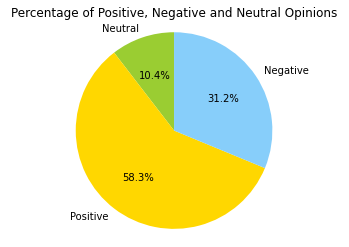

In [7]:

import matplotlib.pyplot as plt

labels = ['Neutral', 'Positive', 'Negative']
quantity = [1148 , 6416 , 3436 ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.title('Percentage of Positive, Negative and Neutral Opinions')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()
     

In [8]:
# dilakukan tokenisasi atau pencacahan

import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    text = word_tokenize(text)
    return text

datayuk['tokenization'] = datayuk['kalimat'].apply(lambda x: tokenization(x))
datayuk.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wahyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,kalimat,label,tokenization
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1,"[warung, ini, dimiliki, oleh, pengusaha, pabri..."
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,"[mohon, ulama, lurus, dan, k212, mmbri, hujjah..."
2,lokasi strategis di jalan sumatera bandung . t...,1,"[lokasi, strategis, di, jalan, sumatera, bandu..."
3,betapa bahagia nya diri ini saat unboxing pake...,1,"[betapa, bahagia, nya, diri, ini, saat, unboxi..."
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1,"[duh, ., jadi, mahasiswa, jangan, sombong, don..."


In [9]:

print(datayuk.kalimat[0])
print(datayuk.tokenization[0])

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !
['warung', 'ini', 'dimiliki', 'oleh', 'pengusaha', 'pabrik', 'tahu', 'yang', 'sudah', 'puluhan', 'tahun', 'terkenal', 'membuat', 'tahu', 'putih', 'di', 'bandung', '.', 'tahu', 'berkualitas', ',', 'dipadu', 'keahlian', 'memasak', ',', 'dipadu', 'kretivitas', ',', 'jadilah', 'warung', 'yang', 'menyajikan', 'menu', 'utama', 'berbahan', 'tahu', ',', 'ditambah', 'menu', 'umum', 'lain', 'seperti', 'ayam', '.', 'semuanya', 'selera', 'indonesia', '.', 'harga', 'cukup', 'terjangkau', '.', 'jangan', 'lewatkan', 'tahu', 'bletoka', 'nya', ',', 'tidak', 'kalah', 'dengan', 'yang', 'asli', 'dari', 'tega

In [10]:
#di normalisasi

def normalization(text):
    text = re.sub(r'[\#\@\!]\w+', '', text) #removing # and @
    text = re.sub('[\d+]','',text) #removing numbers
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) #removing urls 
    text = re.sub(r'[\.\,\;\!\?\*$\"\'\:]', '', text) #removing some non-sense characters
    text = text.lower()
    return text

datayuk['normalization'] = datayuk['kalimat'].transform(normalization).apply(lambda x: tokenization(x))
datayuk.head()

,kalimat,label,tokenization,normalization
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1,"[warung, ini, dimiliki, oleh, pengusaha, pabri...","[warung, ini, dimiliki, oleh, pengusaha, pabri..."
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,"[mohon, ulama, lurus, dan, k212, mmbri, hujjah...","[mohon, ulama, lurus, dan, k, mmbri, hujjah, p..."
2,lokasi strategis di jalan sumatera bandung . t...,1,"[lokasi, strategis, di, jalan, sumatera, bandu...","[lokasi, strategis, di, jalan, sumatera, bandu..."
3,betapa bahagia nya diri ini saat unboxing pake...,1,"[betapa, bahagia, nya, diri, ini, saat, unboxi...","[betapa, bahagia, nya, diri, ini, saat, unboxi..."
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1,"[duh, ., jadi, mahasiswa, jangan, sombong, don...","[duh, jadi, mahasiswa, jangan, sombong, dong, ..."


In [11]:
print(datayuk.kalimat[0])
print(datayuk.normalization[0])

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !
['warung', 'ini', 'dimiliki', 'oleh', 'pengusaha', 'pabrik', 'tahu', 'yang', 'sudah', 'puluhan', 'tahun', 'terkenal', 'membuat', 'tahu', 'putih', 'di', 'bandung', 'tahu', 'berkualitas', 'dipadu', 'keahlian', 'memasak', 'dipadu', 'kretivitas', 'jadilah', 'warung', 'yang', 'menyajikan', 'menu', 'utama', 'berbahan', 'tahu', 'ditambah', 'menu', 'umum', 'lain', 'seperti', 'ayam', 'semuanya', 'selera', 'indonesia', 'harga', 'cukup', 'terjangkau', 'jangan', 'lewatkan', 'tahu', 'bletoka', 'nya', 'tidak', 'kalah', 'dengan', 'yang', 'asli', 'dari', 'tegal']


In [12]:
from nltk.corpus import stopwords
from string import punctuation
import string
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#stop wordd
# function to remove stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet if word not in stop)
  return clean_tweet

datayuk['stopwords'] = datayuk['normalization'].transform(stopWords).apply(lambda x: tokenization(x))
datayuk.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wahyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat,label,tokenization,normalization,stopwords
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1,"[warung, ini, dimiliki, oleh, pengusaha, pabri...","[warung, ini, dimiliki, oleh, pengusaha, pabri...","[warung, ini, dimiliki, oleh, pengusaha, pabri..."
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,"[mohon, ulama, lurus, dan, k212, mmbri, hujjah...","[mohon, ulama, lurus, dan, k, mmbri, hujjah, p...","[mohon, ulama, lurus, dan, k, mmbri, hujjah, p..."
2,lokasi strategis di jalan sumatera bandung . t...,1,"[lokasi, strategis, di, jalan, sumatera, bandu...","[lokasi, strategis, di, jalan, sumatera, bandu...","[lokasi, strategis, di, jalan, sumatera, bandu..."
3,betapa bahagia nya diri ini saat unboxing pake...,1,"[betapa, bahagia, nya, diri, ini, saat, unboxi...","[betapa, bahagia, nya, diri, ini, saat, unboxi...","[betapa, bahagia, nya, diri, ini, saat, unboxi..."
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1,"[duh, ., jadi, mahasiswa, jangan, sombong, don...","[duh, jadi, mahasiswa, jangan, sombong, dong, ...","[duh, jadi, mahasiswa, jangan, sombong, dong, ..."


In [13]:
#sepertinya berlaku dengan bahasa inggris
print(datayuk.kalimat[0])
print(datayuk.stopwords[0])

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !
['warung', 'ini', 'dimiliki', 'oleh', 'pengusaha', 'pabrik', 'tahu', 'yang', 'sudah', 'puluhan', 'tahun', 'terkenal', 'membuat', 'tahu', 'putih', 'di', 'bandung', 'tahu', 'berkualitas', 'dipadu', 'keahlian', 'memasak', 'dipadu', 'kretivitas', 'jadilah', 'warung', 'yang', 'menyajikan', 'menu', 'utama', 'berbahan', 'tahu', 'ditambah', 'menu', 'umum', 'lain', 'seperti', 'ayam', 'semuanya', 'selera', 'indonesia', 'harga', 'cukup', 'terjangkau', 'jangan', 'lewatkan', 'tahu', 'bletoka', 'nya', 'tidak', 'kalah', 'dengan', 'yang', 'asli', 'dari', 'tegal']


In [14]:
#TFIDF
stopwordsku = datayuk['stopwords'].astype(str)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_input_tfidf = tfidf_vectorizer.fit_transform(stopwordsku)

In [16]:
print(tfidf_vectorizer.vocabulary_)

{'warung': 16396, 'ini': 5971, 'dimiliki': 3731, 'oleh': 10793, 'pengusaha': 11665, 'pabrik': 10947, 'tahu': 14878, 'yang': 16617, 'sudah': 14612, 'puluhan': 12506, 'tahun': 14880, 'terkenal': 15387, 'membuat': 8972, 'putih': 12547, 'di': 3209, 'bandung': 904, 'berkualitas': 1515, 'dipadu': 3788, 'keahlian': 6729, 'memasak': 8897, 'kretivitas': 7657, 'jadilah': 6149, 'menyajikan': 9694, 'menu': 9659, 'utama': 16188, 'berbahan': 1280, 'ditambah': 4103, 'umum': 16088, 'lain': 7814, 'seperti': 13858, 'ayam': 734, 'semuanya': 13773, 'selera': 13688, 'indonesia': 5929, 'harga': 5502, 'cukup': 2919, 'terjangkau': 15368, 'jangan': 6209, 'lewatkan': 8063, 'bletoka': 1933, 'nya': 10676, 'tidak': 15626, 'kalah': 6522, 'dengan': 3148, 'asli': 625, 'dari': 3036, 'tegal': 15080, 'mohon': 10102, 'ulama': 16062, 'lurus': 8308, 'dan': 3016, 'mmbri': 10066, 'hujjah': 5752, 'partai': 11172, 'apa': 487, 'harus': 5526, 'diwlh': 4234, 'agar': 127, 'suara': 14588, 'islam': 6088, 'pecah': 11267, 'lokasi': 81

In [17]:

print(stopwordsku[0])
print(X_input_tfidf[0])

['warung', 'ini', 'dimiliki', 'oleh', 'pengusaha', 'pabrik', 'tahu', 'yang', 'sudah', 'puluhan', 'tahun', 'terkenal', 'membuat', 'tahu', 'putih', 'di', 'bandung', 'tahu', 'berkualitas', 'dipadu', 'keahlian', 'memasak', 'dipadu', 'kretivitas', 'jadilah', 'warung', 'yang', 'menyajikan', 'menu', 'utama', 'berbahan', 'tahu', 'ditambah', 'menu', 'umum', 'lain', 'seperti', 'ayam', 'semuanya', 'selera', 'indonesia', 'harga', 'cukup', 'terjangkau', 'jangan', 'lewatkan', 'tahu', 'bletoka', 'nya', 'tidak', 'kalah', 'dengan', 'yang', 'asli', 'dari', 'tegal']
  (0, 15080)	0.1988027604043495
  (0, 3036)	0.059694239947338815
  (0, 625)	0.11810415652630485
  (0, 3148)	0.04763044671656466
  (0, 6522)	0.12054008505345781
  (0, 15626)	0.04449087236888584
  (0, 10676)	0.03257440142425517
  (0, 1933)	0.1988027604043495
  (0, 8063)	0.16769620064015706
  (0, 6209)	0.09175227792930012
  (0, 15368)	0.09117615463807041
  (0, 2919)	0.06669518626011164
  (0, 5502)	0.05766455310506601
  (0, 5929)	0.08846430161028

In [18]:
#Modeling Menggunakan Multilayer Perceptron
#PENGUJIAN 1 : TRAIN 70% : TEST 30%


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

# get X and y
df_X = X_input_tfidf
df_y = datayuk['label']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)


# Model Learning
mlp1= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp1.fit(X_train, y_train)

y_pred_tr = mlp1.predict(X_train)
y_pred_ts = mlp1.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.9055844155844156
Precision : 0.9216359655755394
Recall : 0.8302881098645128
Confuse Matrix Train:
 [[2135    1  255]
 [ 231  506   55]
 [ 183    2 4332]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.8309090909090909
Precision : 0.8534465092149116
Recall : 0.7021100313044562
Confuse Matrix Test:
 [[ 871    4  170]
 [ 178  126   52]
 [ 151    3 1745]]


C:\Users\wahyu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
#PENGUJIAN 2 : TRAIN 80% : TEST 20%
        
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

# get X and y
df_X = X_input_tfidf
df_y = datayuk['label']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)


# Model Learning
mlp2= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp2.fit(X_train, y_train)

y_pred_tr = mlp2.predict(X_train)
y_pred_ts = mlp2.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.8957954545454545
Precision : 0.912759204089394
Recall : 0.8196939311728372
Confuse Matrix Train:
 [[2433    1  314]
 [ 274  567   67]
 [ 256    5 4883]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.8359090909090909
Precision : 0.8499666730450314
Recall : 0.7118899614840816
Confuse Matrix Test:
 [[ 583    6   99]
 [ 117   89   34]
 [ 104    1 1167]]


C:\Users\wahyu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [20]:
#PENGUJIAN 3 : TRAIN 90% : TEST 10%

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

# get X and y
df_X = X_input_tfidf
df_y = datayuk['label']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)


# Model Learning
mlp2= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp2.fit(X_train, y_train)

y_pred_tr = mlp2.predict(X_train)
y_pred_ts = mlp2.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.5848484848484848
Precision : 0.5848484848484848
Recall : 0.3333333333333333
Confuse Matrix Train:
 [[   0    0 3083]
 [   0    0 1027]
 [   0    0 5790]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.5690909090909091
Precision : 0.5690909090909091
Recall : 0.3333333333333333
Confuse Matrix Test:
 [[  0   0 353]
 [  0   0 121]
 [  0   0 626]]


C:\Users\wahyu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [22]:
#evaluation
from sklearn.metrics import classification_report

test = mlp1.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

Testing selesai
              precision    recall  f1-score   support

          -1       0.72      0.82      0.77       353
           0       0.92      0.30      0.45       121
           1       0.88      0.92      0.90       626

    accuracy                           0.82      1100
   macro avg       0.84      0.68      0.71      1100
weighted avg       0.83      0.82      0.81      1100



In [27]:
#cross validation
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = df_y

for iteration, data in enumerate(kf.split(df_X), start=1):

    data_train   = df_X[data[0]]
    target_train = y[data[0]]

    data_test    = df_X[data[1]]
    target_test  = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

          -1       0.77      0.78      0.78       680
           0       0.83      0.70      0.76       239
           1       0.87      0.89      0.88      1281

    accuracy                           0.84      2200
   macro avg       0.83      0.79      0.81      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 2
              precision    recall  f1-score   support

          -1       0.81      0.75      0.78       706
           0       0.75      0.75      0.75       220
           1       0.88      0.91      0.89      1274

    accuracy                           0.84      2200
   macro avg       0.81      0.80      0.81      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 3
              precision    recall  f1-score   support

          -1       0.79      0.77      0.78       682
           0       0.83      0.78      0.80       215
           1       0.88      0

In [53]:
original_text =  '''
mohon ulama lurus da

'''

# Feature Extraction
#text = tfidf_vectorizer.fit_transform(stopwordsku)
text = tfidf_vectorizer.transform([normalization(original_text)])

# Kita prediksi sentimennya
result = mlp1.predict(text)[0]

print("Sentiment:")
print()
print(result)

if result == 1:
   print("Positive Sentiment Bosku")
elif result == 0:
   print("Neutral Sentiment Bosku ")
elif result == -1:
   print("Negative Sentiment Bosku ")





Sentiment:

-1
Negative Sentiment Bosku 
